/var/folders/fm/cd_pjjks48114thy_txjwvs1tjjn_t/T/ipykernel_37952/880694905.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


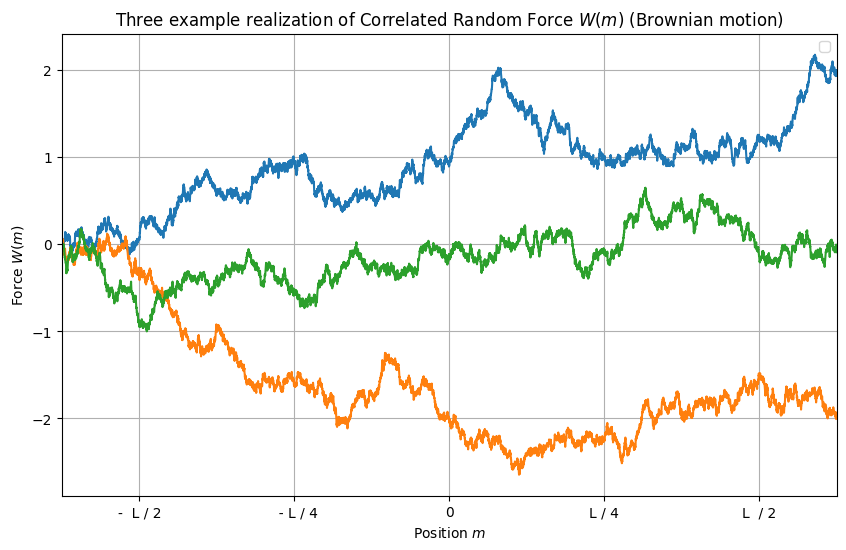

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(43)

# Parameters
Gamma = 1.0   # Damping coefficient
k = 1.0       # Spring constant (restoring force strength)
H_step = 1.0  # Step in the external driving field
dt = 0.0001    # Time step
T = 30.0      # Total simulation time
m0 = 0.0      # Initial displacement
D = 0.1       # Amplitude of the noise
L = 10.0      # Length of the spatial range for W(m)
dx = 0.001  # Sampling step for the spatial range


# Plot the generated correlated force W(m)
plt.figure(figsize=(10, 6))
plt.xlabel("Position $m$")
plt.ylabel("Force $W(m)$")
plt.title("Three example realization of Correlated Random Force $W(m)$ (Brownian motion)")
plt.grid()
plt.legend()
plt.xlim(-L/2,L/2)

for times in range(3):
  # Spatial range for W(m)
  x = np.arange(-L/2, L/2, dx)
  N = len(x)
  # Generate a correlated random force W(m) using a Brownian motion approach
  increments = np.random.normal(0, np.sqrt(2 * D * dx), size=N - 1)
  correlated_force = np.zeros(N)
  correlated_force[1:] = np.cumsum(increments)  # Cumulative sum generates Brownian motion
  
  plt.plot(x, correlated_force, label="Three example realization of Correlated Random Force $W(m)$ (Brownian motion)")

custom_labels = ["-  L / 2", "  - L / 4", "0", "L / 4", "L  / 2"]
plt.xticks([-4, -2, 0, 2, 4], custom_labels)

plt.savefig("correlated_force.svg")
plt.show()


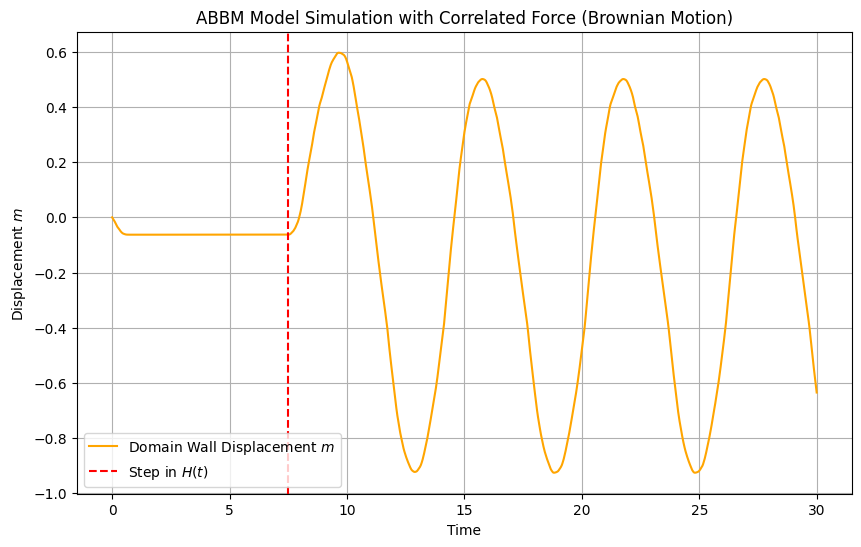

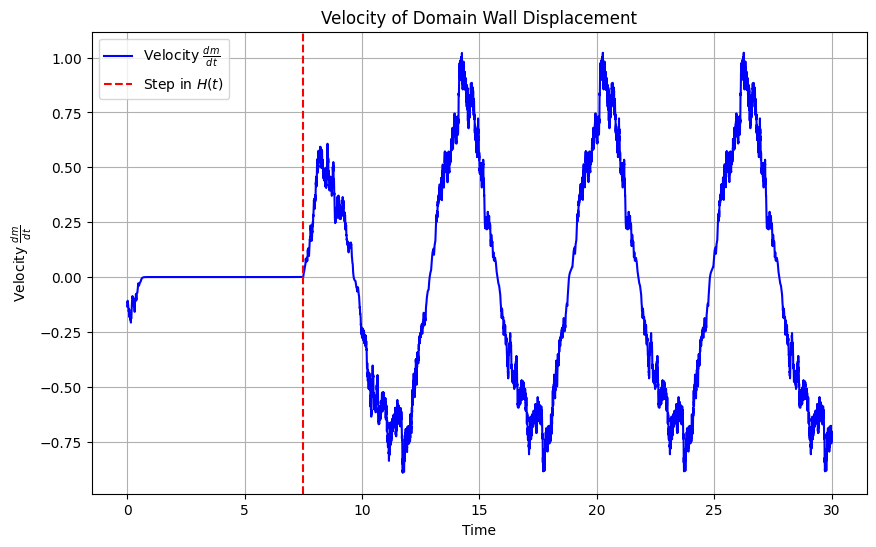

In [16]:
#### STEP

# Time points for simulation
# time = np.arange(0, T, dt)
# H = np.zeros_like(time)
# H[time > T / 4] = H_step  # Step in H at T/4

# Time points for simulation
time = np.arange(0, T, dt)
H = np.zeros_like(time)

f = 1/6  # Frequency of the probe signal (ν)
A = 1

# H[time > 0] = A * np.cos( 2 * np.pi * f time[time > T / 4])  # Step in H at T/4
H[time > T / 4] = A * np.sin(
    2 * np.pi * f * (time[time > T / 4] - T / 4)
)  # Step in H at T/4

# Initialize displacement array for the ABBM model
m = np.zeros_like(time)
m[0] = m0

# Simulate the dynamics of the ABBM model with the correlated force
for i in range(1, len(time)):
    # Update interpolated force
    W_interp = np.interp(m[i - 1], x, correlated_force)
    # Compute the net force and update displacement using Euler integration
    dm = (H[i] - k * m[i - 1] + W_interp) / Gamma * dt
    m[i] = m[i - 1] + dm

# Plot the displacement over time
plt.figure(figsize=(10, 6))
plt.plot(time, m, label='Domain Wall Displacement $m$', color='orange')
plt.axvline(T / 4, color='red', linestyle='--', label='Step in $H(t)$')
plt.xlabel('Time')
plt.ylabel('Displacement $m$')
plt.title('ABBM Model Simulation with Correlated Force (Brownian Motion)')
plt.legend()
plt.grid()
plt.show()

# Plot the velocity (dm/dt) over time
velocity = np.diff(m) / dt  # Calculate velocity
plt.figure(figsize=(10, 6))
plt.plot(time[:-1], velocity, label='Velocity $\\frac{dm}{dt}$', color='blue')
plt.axvline(T / 4, color='red', linestyle='--', label='Step in $H(t)$')
plt.xlabel('Time')
plt.ylabel('Velocity $\\frac{dm}{dt}$')
plt.title('Velocity of Domain Wall Displacement')
plt.legend()
plt.grid()
plt.show()

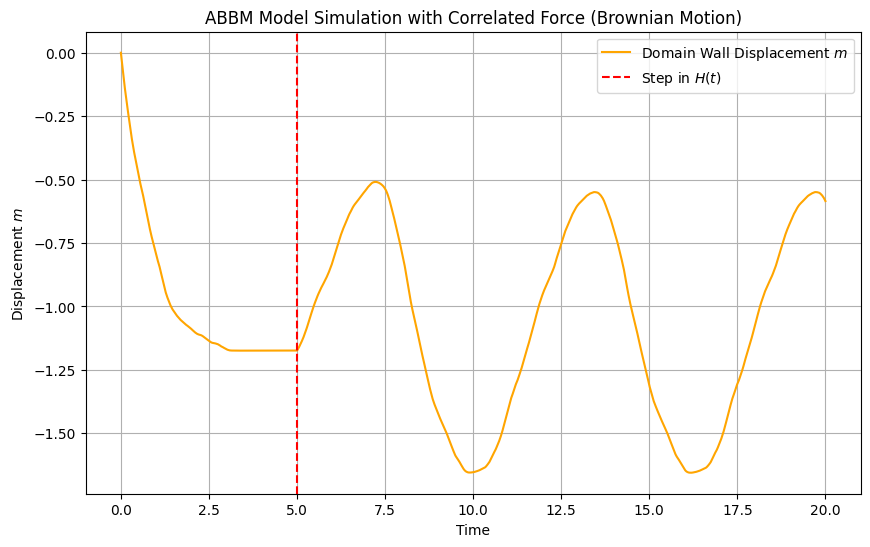

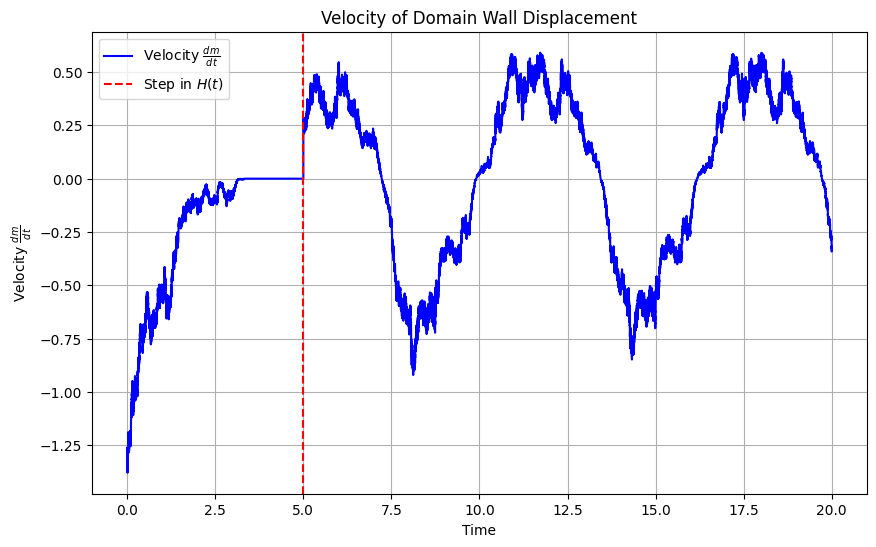

In [4]:
#### COSINE

# Time points for simulation
time = np.arange(0, T, dt)
H = np.zeros_like(time)
H[time > T / 4] = np.cos(time[time > T / 4])  # Step in H at T/4

# Initialize displacement array for the ABBM model
m = np.zeros_like(time)
m[0] = m0

# Simulate the dynamics of the ABBM model with the correlated force
for i in range(1, len(time)):
    # Update interpolated force
    W_interp = np.interp(m[i - 1], x, correlated_force)
    # Compute the net force and update displacement using Euler integration
    dm = (H[i] - k * m[i - 1] + W_interp) / Gamma * dt
    m[i] = m[i - 1] + dm

# Plot the displacement over time
plt.figure(figsize=(10, 6))
plt.plot(time, m, label='Domain Wall Displacement $m$', color='orange')
plt.axvline(T / 4, color='red', linestyle='--', label='Step in $H(t)$')
plt.xlabel('Time')
plt.ylabel('Displacement $m$')
plt.title('ABBM Model Simulation with Correlated Force (Brownian Motion)')
plt.legend()
plt.grid()
# plt.savefig("abbm_model_correlated_force_brownian.svg")
plt.show()

# Plot the velocity (dm/dt) over time
velocity = np.diff(m) / dt  # Calculate velocity
plt.figure(figsize=(10, 6))
plt.plot(time[:-1], velocity, label='Velocity $\\frac{dm}{dt}$', color='blue')
plt.axvline(T / 4, color='red', linestyle='--', label='Step in $H(t)$')
plt.xlabel('Time')
plt.ylabel('Velocity $\\frac{dm}{dt}$')
plt.title('Velocity of Domain Wall Displacement')
plt.legend()
plt.grid()
# plt.savefig("abbm_model_velocity.svg")
plt.show()

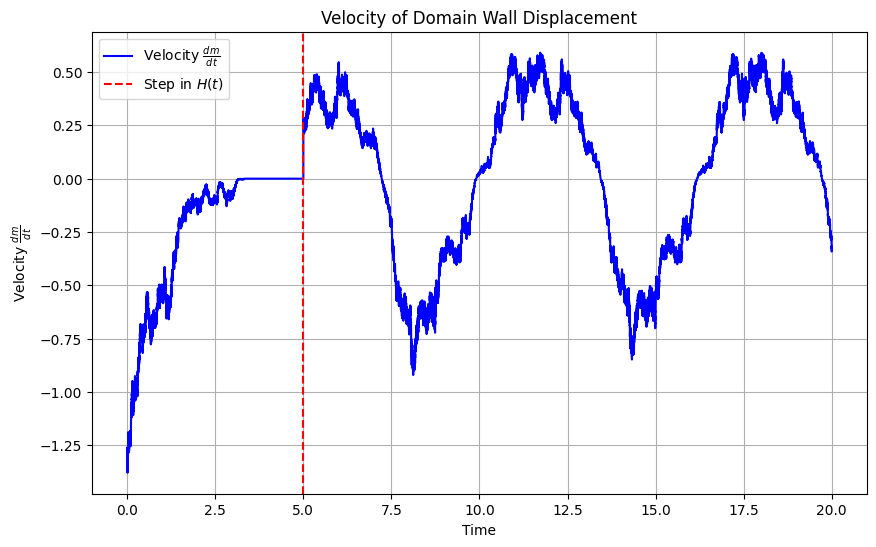

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(time[:-1], velocity, label='Velocity $\\frac{dm}{dt}$', color='blue')
plt.axvline(T / 4, color='red', linestyle='--', label='Step in $H(t)$')
plt.xlabel('Time')
plt.ylabel('Velocity $\\frac{dm}{dt}$')
plt.title('Velocity of Domain Wall Displacement')
plt.legend()
plt.grid()
plt.show()

In [ ]:
print(T/4)

5.0


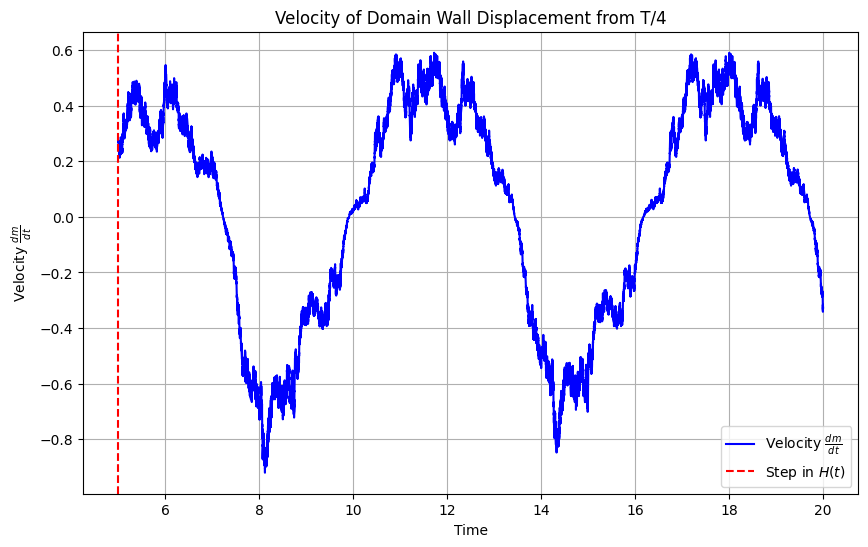

In [ ]:
start_from = int(len(time)/4)

plt.figure(figsize=(10, 6))
plt.plot(time[start_from:-1], velocity[start_from:], label='Velocity $\\frac{dm}{dt}$', color='blue')
plt.axvline(T / 4, color='red', linestyle='--', label='Step in $H(t)$')
plt.xlabel('Time')
plt.ylabel('Velocity $\\frac{dm}{dt}$')
plt.title('Velocity of Domain Wall Displacement from T/4')
plt.legend()
plt.grid()
plt.show()

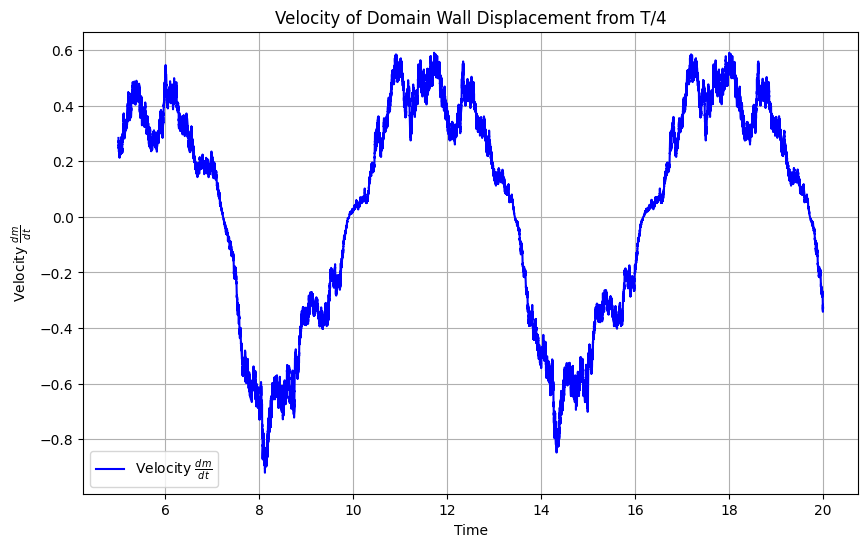

In [ ]:
start_from = int(len(time)/4) # int(len(time) / (T/4))

plt.figure(figsize=(10, 6))
plt.plot(time[start_from:-1], velocity[start_from:], label='Velocity $\\frac{dm}{dt}$', color='blue')
plt.xlabel('Time')
plt.ylabel('Velocity $\\frac{dm}{dt}$')
plt.title('Velocity of Domain Wall Displacement from T/4')
plt.legend()
plt.grid()
plt.show()